**1**.(20 points)

Consider the following system of equations:

$$\begin{align*}
2x_1& - x_2&    +x_x    &=& 6\\
-x_1& +2x_2& -  x_3 &=& 2\\
 x_1   &  -x_2& + x_3 &=& 1
\end{align*}$$

1. Consider the system in matrix form $Ax=b$ and define $A$, $b$ in numpy. (5 points)
2. Show that $A$ is positive-definite (5 points)
3. Use the appropriate matrix decomposition function in numpy and back-substitution to solve the system (10 points)

In [42]:
import numpy as np
import scipy.linalg as la

A = np.array([
    [2, -1, 1],
    [-1, 2, -1],
    [1, -1, 1]
])

b = np.array([6,2,1]).reshape(-1,1)

la.eigvalsh(A)

array([0.26794919, 1.        , 3.73205081])

Since all eigenvalues are positive, $A$ is positive definite.

Thus, for a positive definite matrix A, a cholesky decomposition is the most appropriate choice. 

**Please note that cholesky only works on positive definite, but not on all symmetric matrices.**

In [43]:
C = np.linalg.cholesky(A)

Back substitution:

$Ax = b \longrightarrow MNx = b \longrightarrow M(Nx) = b \longrightarrow My = b \longrightarrow Nx = y$ 

In [44]:
y = la.solve_triangular(C, b, lower=True)
x = la.solve_triangular(C.T, y, lower=False)

x

array([[ 5.],
       [ 3.],
       [-1.]])

In [45]:
A @ x

array([[6.],
       [2.],
       [1.]])

**Alternative**

In [3]:
la.cho_solve(la.cho_factor(A), b)

array([[ 5.],
       [ 3.],
       [-1.]])

**2**. (20 points)

Exact geometric solutions with $n = m$

- Find the equation of the line that passes through the points (2,1) and (3,7)
- Find the equation of the circle that passes through the points (1,7), (6,2) and (4,6)

Hint: The equation of a circle can be written as

$$
(x - a)^2 + (y - b)^2 = r^2
$$

- Find the equation of the line that passes through the points (2,1) and (3,7)

We write the following equation using matrix notation

$a_0 + a_1 x = y$

In [46]:
x = np.array([2,3])
y = np.array([1,7])
A = np.c_[np.ones(2), x]

In [47]:
A

array([[1., 2.],
       [1., 3.]])

In [48]:

la.solve(A, y)

array([-11.,   6.])

Find the equation of the circle that passes through the points (1,7), (6,2) and (4,6)

We expand the circle equation to get

$$
x^2 - 2ax + a^2 + y^2 - 2by + b^2 = r^2
$$

and rearrange terms

$$
2ax + 2by + (r^2 - a^2 -b^2) = x^2 + y^2
$$

which we can solve as a matrix equation.

In [6]:
x = np.array([1, 6, 4])
y = np.array([7, 2, 6])
A = np.c_[2*x, 2*y, np.ones(3)]

In [7]:
A

array([[ 2., 14.,  1.],
       [12.,  4.,  1.],
       [ 8., 12.,  1.]])

In [9]:
la.solve(A, x**2 + y**2)

array([ 1.,  2., 20.])

**3**. 20 points

- Load the matrix in `Q2.npy` - this consists of two columns representing the x and y coordinates of 10 points
- Find the equation of the circle that best fits these points
- Plot the points and fitted circle

Hint: You need to estimate the center of the circle and its radius.

In [56]:
X = np.load('Q2.npy')

In [57]:
X

array([[-2.        ,  0.10611415],
       [-1.55555556, -1.37743284],
       [-1.11111111, -1.6570774 ],
       [-0.66666667,  1.77409394],
       [-0.22222222, -2.00366513],
       [ 0.22222222,  1.91844924],
       [ 0.66666667, -1.93359695],
       [ 1.11111111,  1.76322183],
       [ 1.55555556,  1.28982612],
       [ 2.        , -0.05969788]])

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

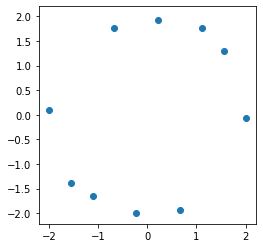

In [59]:
plt.scatter(X[:,0], X[:,1])
plt.axis('square')
pass

- Find the equation of the circle that best fits these points (15 points)

$$
x^2 - 2ax + a^2 + y^2 - 2by + b^2 = r^2
$$

and rearrange terms

$$
2ax + 2by + (r^2 - a^2 -v^2) = x^2 + y^2
$$

In [60]:
A = np.c_[2*X, np.ones(X.shape[0])]
A

array([[-4.        ,  0.21222829,  1.        ],
       [-3.11111111, -2.75486568,  1.        ],
       [-2.22222222, -3.3141548 ,  1.        ],
       [-1.33333333,  3.54818789,  1.        ],
       [-0.44444444, -4.00733026,  1.        ],
       [ 0.44444444,  3.83689849,  1.        ],
       [ 1.33333333, -3.8671939 ,  1.        ],
       [ 2.22222222,  3.52644366,  1.        ],
       [ 3.11111111,  2.57965224,  1.        ],
       [ 4.        , -0.11939576,  1.        ]])

In [61]:
sol = la.lstsq(A, np.sum(X**2, axis=1))[0]

a, b, z = sol

r = np.sqrt(z - a**2 - b**2)

r, a, b

(2.0069277559382903, 0.023593590975478498, -0.03527051891705024)

- Plot the points and fitted circle (5 points)

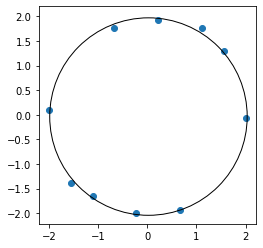

In [62]:
plt.scatter(X[:,0], X[:,1])
c = plt.Circle([a,b], r, fill=False)
plt.gca().add_artist(c, )
plt.axis('square')
pass

**4**. 20 points

The figure below shows the current population of Durham, Chapel Hill and Raleigh. Arrows show fractions that move between cities each year.

- What are the population sizes of the 3 cities after 3 years have passed?
- Find the steady state population of the 3 cities by solving a linear system.

Assume no births, deaths or any other fluxes other than those shown.

![img](Q3.png)

In [3]:
import numpy as np
import scipy.linalg as la

In [4]:
M = np.array([
    [0.9, 0.05, 0.05],
    [0.2, 0.5, 0.3],
    [0, 0.2, 0.8]
]).T


x = np.array([300000, 80000, 500000])[:, None]

In [5]:
x.sum()

880000

In [6]:
M

array([[0.9 , 0.2 , 0.  ],
       [0.05, 0.5 , 0.2 ],
       [0.05, 0.3 , 0.8 ]])

- What are the population sizes of the 3 cities after 3 years have passed? (5 points)

In [34]:
each = (np.linalg.matrix_power(M, 3) @ x).astype('int')
each

array([[295480],
       [186620],
       [397900]])

In [35]:
each.sum()

880000

- Find the steady state population of the 3 cities by solving a linear system. (15 points)

Note

- You are asked for the steady state *population*
- A check for both cases is that total population does not change

In [7]:
T = M - np.eye(3)
T[-1,:] = [1,1,1]
T


array([[-0.1 ,  0.2 ,  0.  ],
       [ 0.05, -0.5 ,  0.2 ],
       [ 1.  ,  1.  ,  1.  ]])

In [8]:
p = la.solve(T, np.array([0,0,1]))
p

array([0.4, 0.2, 0.4])

In [9]:
p * x.sum()

array([352000., 176000., 352000.])

In [10]:
M @ p

array([0.4, 0.2, 0.4])

In [20]:
M

array([[0.9 , 0.2 , 0.  ],
       [0.05, 0.5 , 0.2 ],
       [0.05, 0.3 , 0.8 ]])

In [40]:
u,v = la.eig(M)
u

array([1.        +0.j, 0.84494897+0.j, 0.35505103+0.j])

In [33]:
a = v[:,0]
a

array([-0.66666667, -0.33333333, -0.66666667])

In [37]:
res = a/a.sum()
res

array([0.4, 0.2, 0.4])

In [38]:
M@res

array([0.4, 0.2, 0.4])

In [39]:
M@M@res

array([0.4, 0.2, 0.4])

In [63]:
res * 880000

array([352000., 176000., 352000.])

**5** (20 points)

The file `Q5.npy` contains the x and y coordinates in cols 1 and 2 respectively. 

- Find a cubic polynomial model to fit the data using the normal equations
- Provide a geometric interpretation of the solution in terms of projection of a vector onto a space. What is the vector, what is the basis of the space, and what does the numerical solution you obtained represent?

In [26]:
x, y = np.load('Q5.npy').T

y = y[:, None]

- Find a cubic polynomial model to fit the data using the normal equations (5 points)

In [27]:
X = np.c_[x**3, x**2, x, np.ones_like(x)]

np.linalg.solve(X.T@X, X.T@y)

array([[ 0.99809019],
       [-0.54438689],
       [-1.02188927],
       [-1.99235962]])

In [29]:
la.lstsq(X, y)[0]

array([[ 0.99809019],
       [-0.54438689],
       [-1.02188927],
       [-1.99235962]])

The description should indicate some version the following points

- The vector being projected is $y$
- It is being projected onto the column space of $X$
- The columns of $X$ corresponds to the coefficients representing the vector space of cubic polynomials
- The numerical solution is the vector of coefficients for a cubic polynomial that is closest to $y$